In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load data
df=pd.read_csv("ab.csv")
df

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_2112\679295092.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("ab.csv")


,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant
0,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,Other,0,0,NaN
1,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,XBB.1.5,0,0,NaN
2,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.351,0,0,NaN
3,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.617.2,0,0,NaN
4,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.1.7,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
128150,Sweden,SE,2023-17,TESSy,1053.0,44,4.2,True,BA.2,2,44,4.5
128151,Sweden,SE,2023-17,TESSy,1053.0,44,4.2,True,BQ.1,2,44,4.5
128152,Sweden,SE,2023-17,TESSy,1053.0,44,4.2,True,Other,6,44,13.6
128153,Sweden,SE,2023-17,TESSy,1053.0,44,4.2,True,XBB,21,44,47.7


In [3]:
# To check null values
df.isnull().sum()

country                               0
country_code                          0
year_week                             0
source                                0
new_cases                          4060
number_sequenced                      0
percent_cases_sequenced            1571
valid_denominator                     0
variant                               0
number_detections_variant             0
number_sequenced_known_variant        0
percent_variant                   18928
dtype: int64

In [4]:
# To check mean
mean= df["new_cases"].mean()
mean

39717.843353882105

In [5]:
mean1= df["percent_cases_sequenced"].mean()
mean1

10.055027491626115

In [6]:
# Fill null values by mean

df["new_cases"]= df['new_cases'].replace(np.nan,mean)
df["percent_cases_sequenced"]= df['percent_cases_sequenced'].replace(np.nan,mean1)


In [7]:
# Drop null values
df.dropna(subset=['percent_variant'],axis=0,inplace=True)

In [8]:
df.isnull().sum()

country                           0
country_code                      0
year_week                         0
source                            0
new_cases                         0
number_sequenced                  0
percent_cases_sequenced           0
valid_denominator                 0
variant                           0
number_detections_variant         0
number_sequenced_known_variant    0
percent_variant                   0
dtype: int64

In [9]:
# Normalize data
Q1 = df['number_sequenced'].quantile(0.25)
Q3 = df['number_sequenced'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['number_sequenced'] > lower_bound) & (df['number_sequenced'] < upper_bound)]

(0.0, 1225.0)

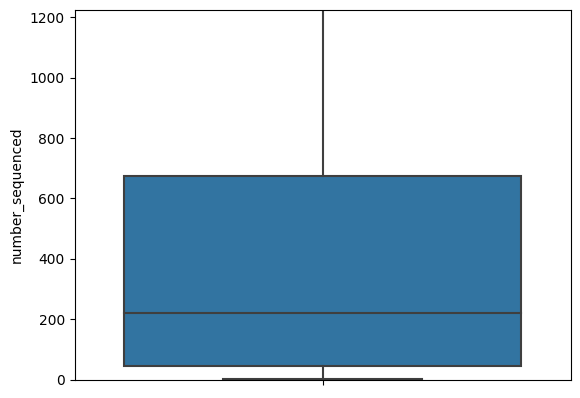

In [10]:
# boxplot
sns.boxplot(data=df,y='number_sequenced')
plt.ylim(0,1225)

<AxesSubplot: xlabel='number_sequenced', ylabel='Count'>

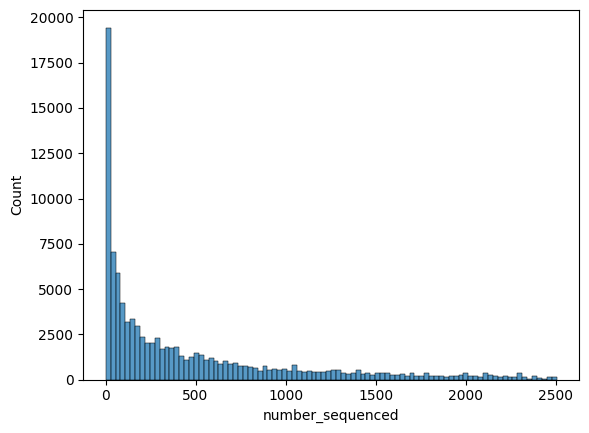

In [11]:
# Histplot
sns.histplot(df['number_sequenced'])

In [12]:
Q1 = df['new_cases'].quantile(0.25)
Q3 = df['new_cases'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['new_cases'] > lower_bound) & (df['new_cases'] < upper_bound)]

(0.0, 27900.0)

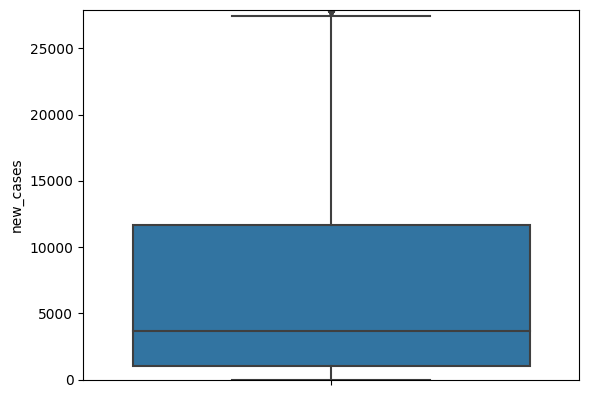

In [24]:
sns.boxplot(data=df,y='new_cases')
plt.ylim(0,27900)

<AxesSubplot: xlabel='new_cases', ylabel='Count'>

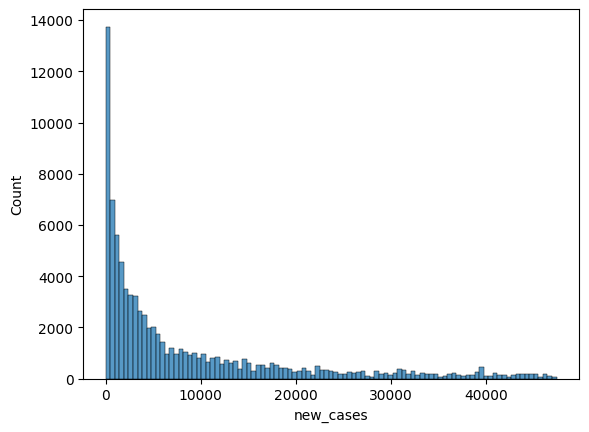

In [14]:
sns.histplot(df['new_cases'])

In [15]:
# Selecting two col
workshop_data = df[["new_cases","number_sequenced"]]
workshop_data.head()

,new_cases,number_sequenced
176,12.0,8
177,12.0,8
178,12.0,8
179,12.0,8
180,12.0,8


In [16]:
# Fit the model

X=workshop_data.iloc[:, :1].values
y=workshop_data.iloc[:,1].values
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=1/5, random_state=0)
from sklearn.linear_model import LinearRegression
modle = LinearRegression()
modle.fit(X_train,y_train)

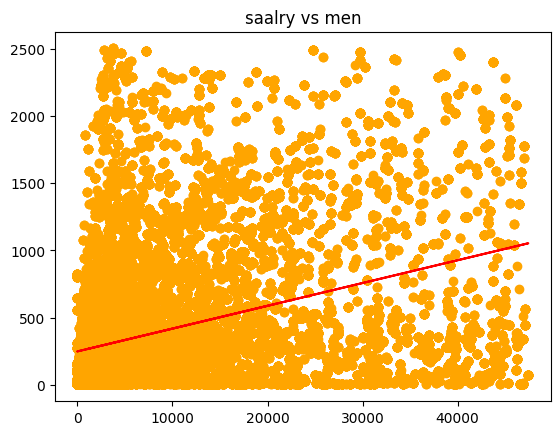

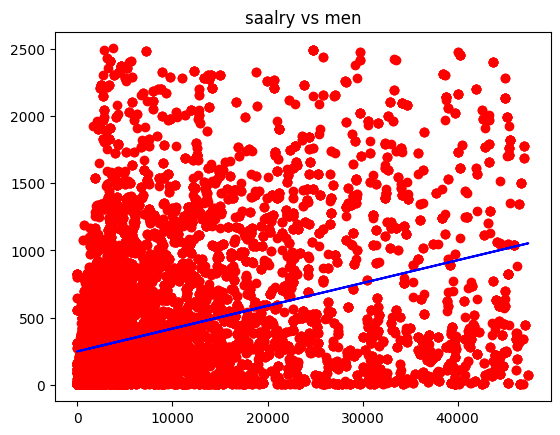

In [19]:
viz_train=plt
viz_train.scatter(X_train, y_train, color= "orange")
viz_train.plot(X_train, modle.predict(X_train), color="red")
viz_train.title("Covid data")

viz_train.show()

# visualizing the test set result

viz_test = plt
viz_test.scatter(X_test,y_test, color= "red")
viz_test.plot(X_train, modle.predict(X_train), color="blue")
viz_test.title("Covid data")

viz_test.show()

In [25]:
# Check accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


data=workshop_data


X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=42)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

accuracy=knn.score(X_test,y_test)
print('Accuracy:',accuracy)

Accuracy: 0.7442378746114597


In [33]:
# Pridict values(any)

knn.predict([[40095]])

array([1734], dtype=int64)